In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
import miepython
import numpy as np
import rayleigh

#qabs_ray = qext_ray - qscat_ray
#m = 1.339-1.86e-9j # 0.400 microns

In [3]:
xs = np.linspace(.01,3000,1000) # List of size parameters
m = 1.33-0.9j # Index of Refraction

qext_mie, qscat_mie, qbsca_mie, g_mie = miepython.mie(m=m, x=xs)
qabs_mie = qext_mie - qscat_mie

qext_ray, qscat_ray, qbsca_ray, g_ray = rayleigh.rayleigh(m=m, x=xs)


(1000,) (1000,)
(1000,)


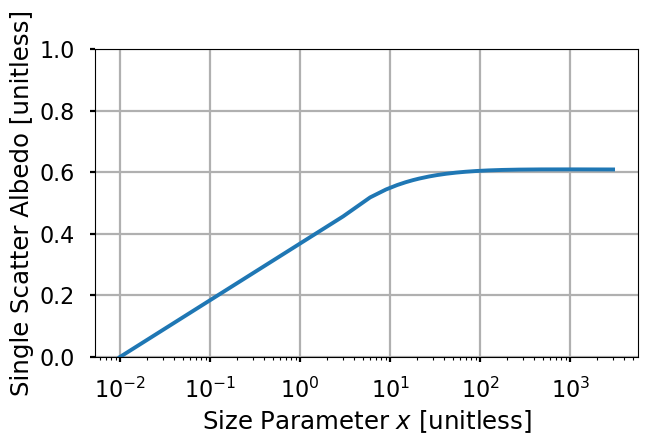

In [4]:
print(xs.shape, qscat_mie.shape)
print(qext_mie.shape)
plt.figure(figsize=(7,4))
plt.plot(xs, qscat_mie/qext_mie, label=r"Mie")
#plt.legend(loc=0)
plt.xscale('log')
plt.ylim(0,1)
plt.grid()
plt.ylabel("Single Scatter Albedo [unitless]")
plt.xlabel("Size Parameter $x$ [unitless]")
plt.show()

In [5]:
xs = np.linspace(0.01,50,200) # List of size parameters

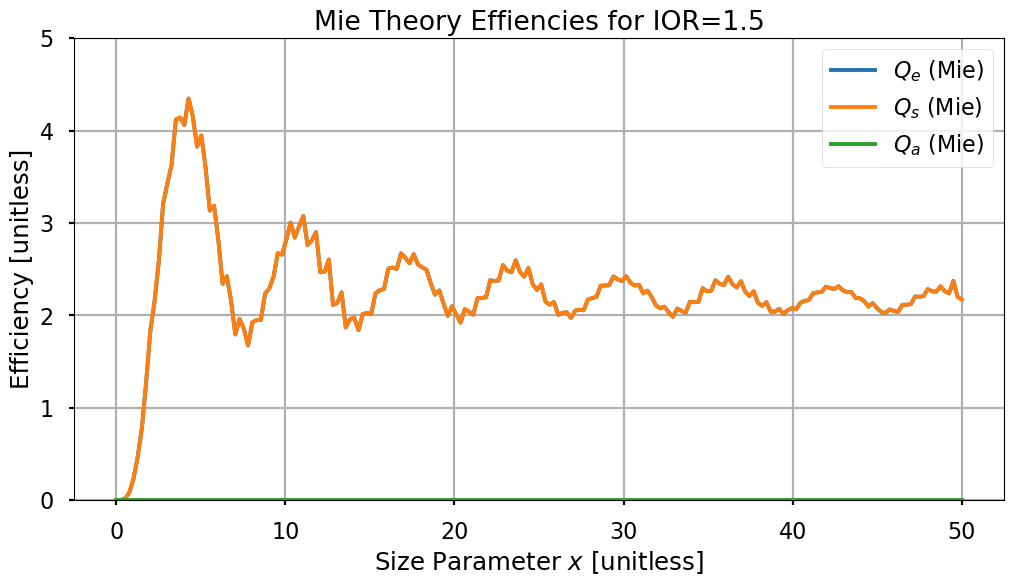

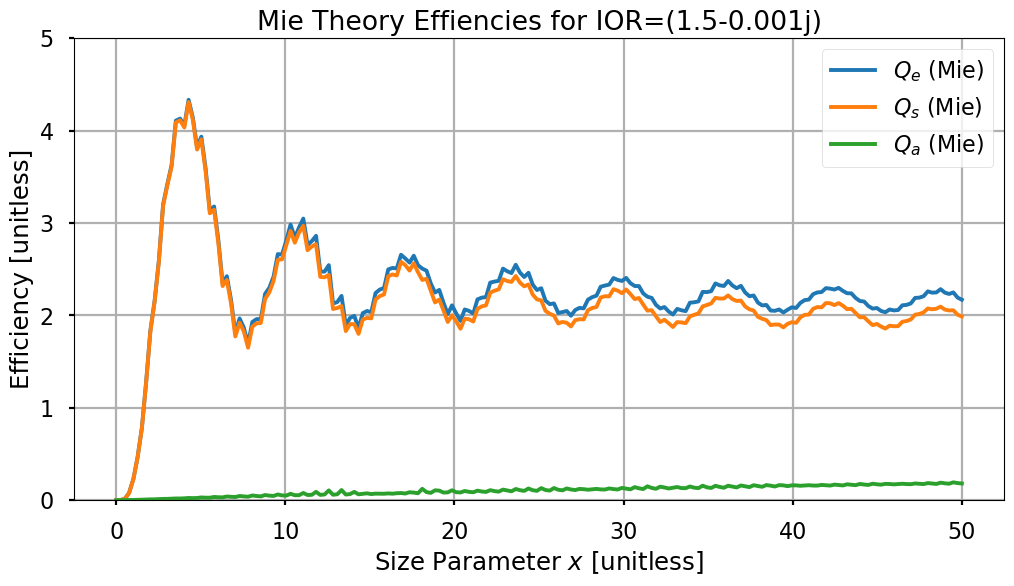

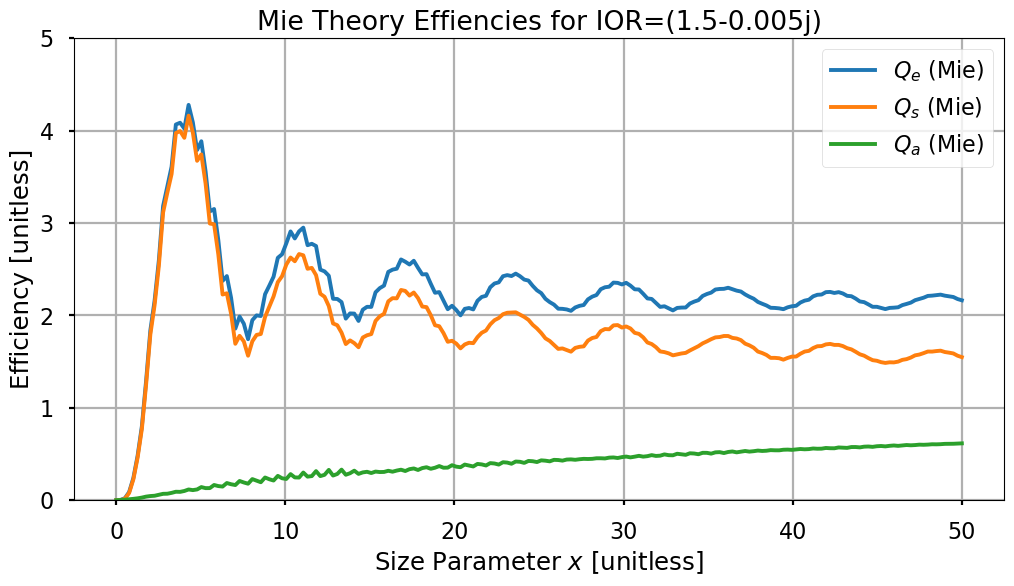

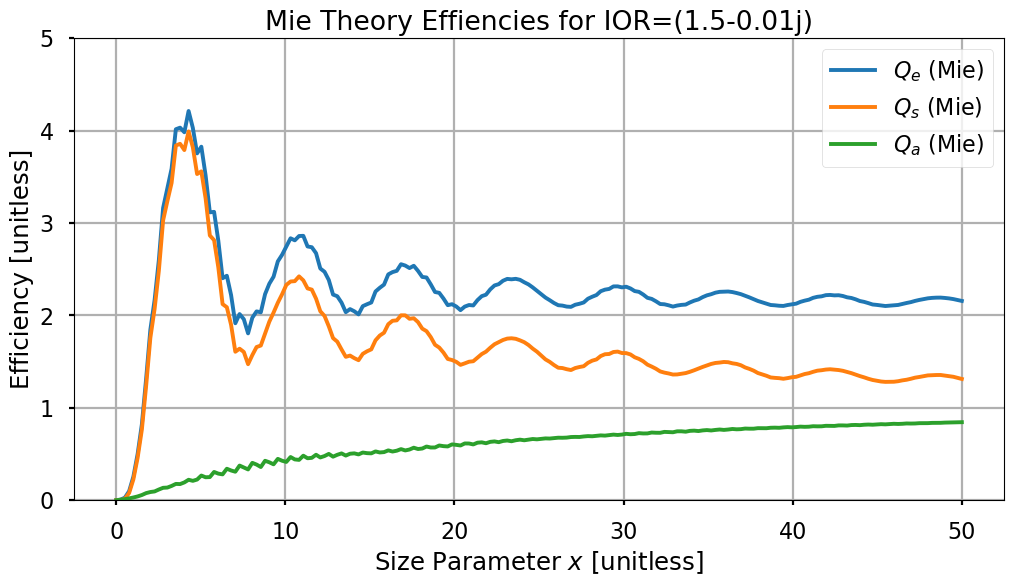

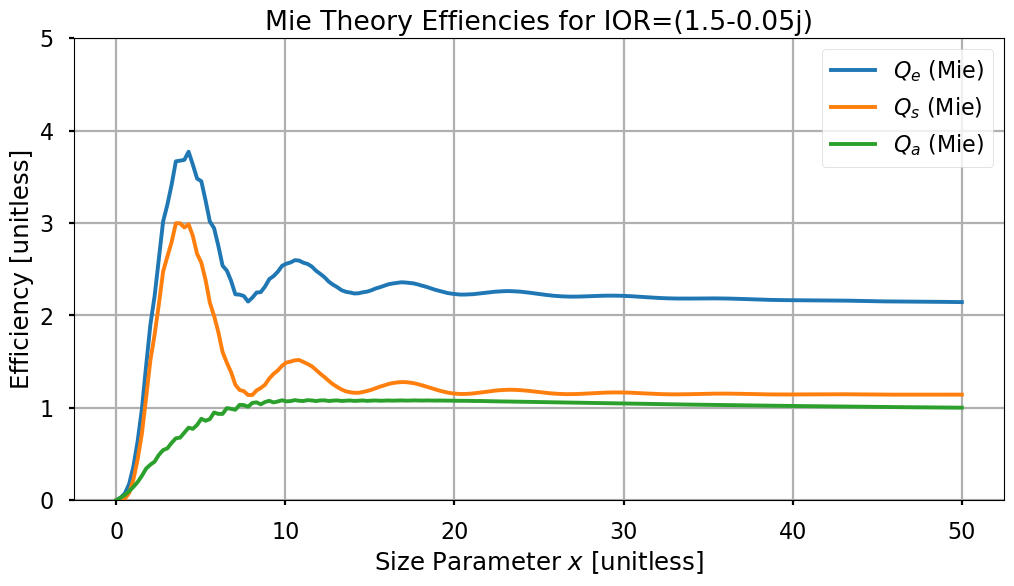

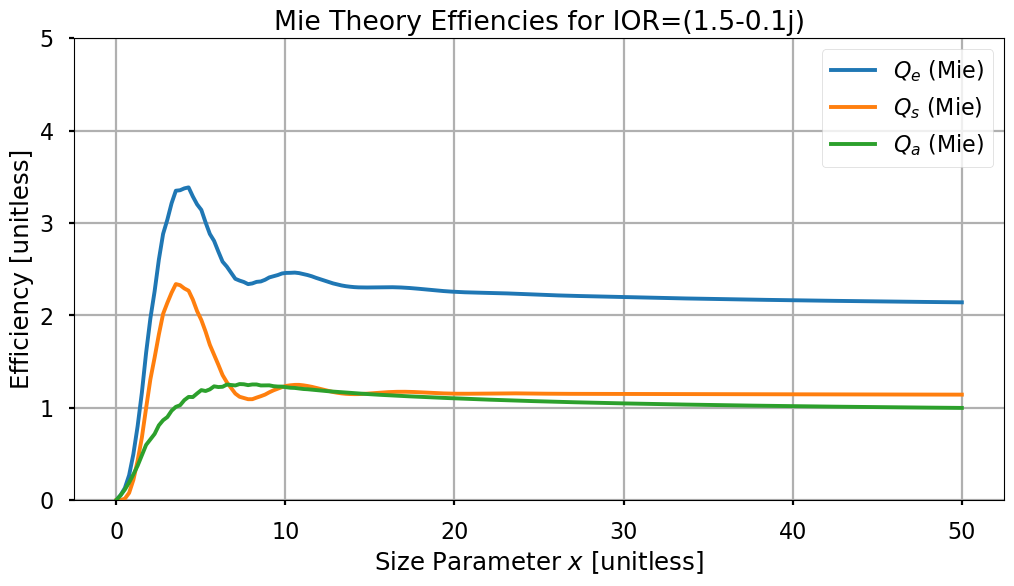

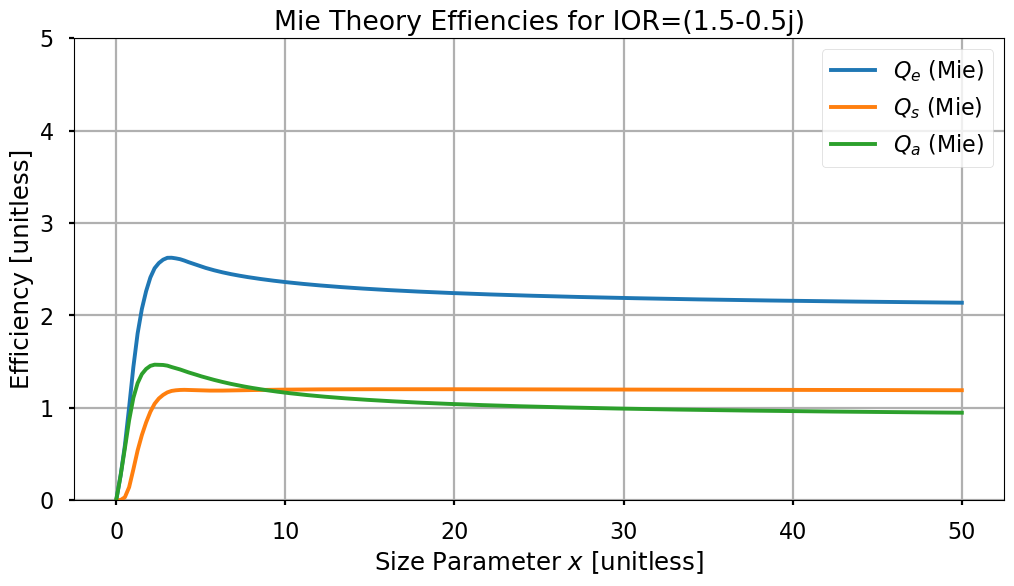

In [6]:
ior = [1.5, 1.5-0.001j,1.5-0.005j,1.5-0.01j,1.5-0.05j,1.5-0.1j,1.5-0.5j]

for m in ior:
    qext_mie, qscat_mie, qbsca_mie, g_mie = miepython.mie(m=m, x=xs)
    qabs_mie = qext_mie - qscat_mie
    plt.figure(figsize=(12,6))
    plt.plot(xs, qext_mie, label=r"$Q_{e}$ (Mie)")
    plt.plot(xs, qscat_mie, label=r"$Q_{s}$ (Mie)")
    plt.plot(xs, qabs_mie, label=r"$Q_{a}$ (Mie)")

    plt.legend(loc=0)
    plt.grid()
    plt.ylim(0,5)
    plt.ylabel("Efficiency [unitless]")
    plt.xlabel("Size Parameter $x$ [unitless]")
    plt.title(f"Mie Theory Effiencies for IOR={m}")
    plt.show()

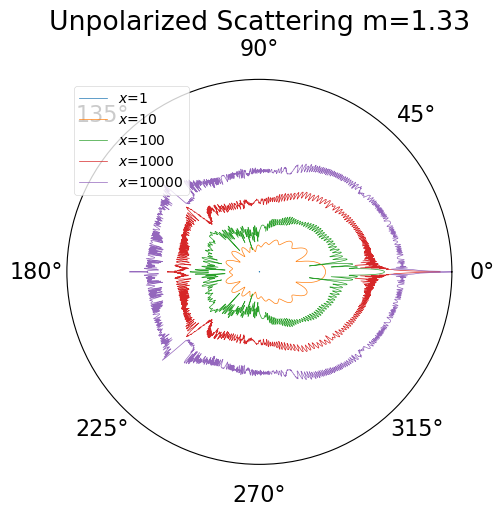

In [7]:
x = 0.1
theta = np.linspace(-180,180,2000)
mu = np.cos(theta/180*np.pi)

m = 1.33# + 0.00001j

fig,ax = plt.subplots(1,1,figsize=(12,5))
ax=plt.subplot(121, projection='polar')
plt.grid(False)


for x in [1,10,100,1000,10000]:
    up_scat = miepython.i_unpolarized(m,x,mu, norm='Wiscombe')
    max_scat = np.max(up_scat)
    ax.plot(theta/180*np.pi, up_scat, label=fr'$x$={x}', lw=.5)
ax.set_rlim(0)
ax.set_rscale('symlog')
ax.set_yticklabels([])
#ax.set_theta_zero_location('N')
plt.legend(loc=0, fontsize=10)
#ax.set_rticks([0.05, 0.1,0.2])
ax.set_title(fr"Unpolarized Scattering m={m}")
plt.show()

No handles with labels found to put in legend.


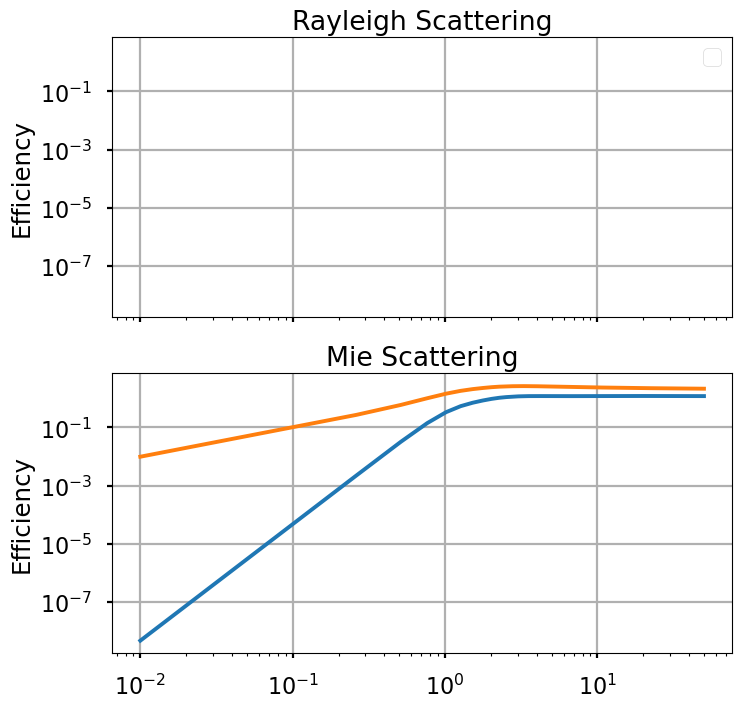

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,8), sharex=True, sharey=True)
ax[0].set_title("Rayleigh Scattering")

ax[1].set_title("Mie Scattering")
#ax[0].plot(xs, qscat_ray, label=r"$Q_s$")
ax[1].plot(xs, qscat_mie)
#ax[0].plot(xs, qabs_ray)
#ax[1].plot(xs, qabs_mie)
#ax[0].plot(xs, qext_ray, label=r"$Q_e$")
ax[0].grid(True)

ax[0].legend()
ax[0].set_ylabel('Efficiency')
ax[1].set_ylabel('Efficiency')

ax[1].plot(xs, qext_mie)
ax[1].grid(True)
plt.yscale('log')
plt.xscale('log')


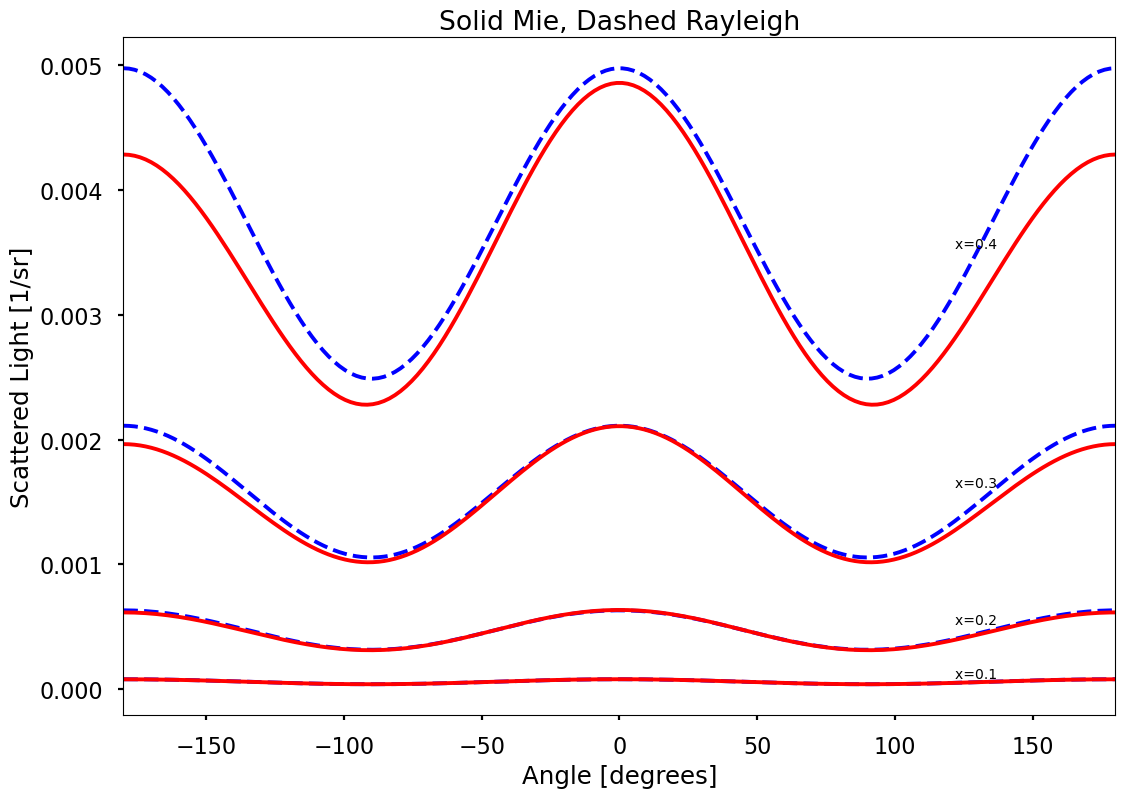

In [14]:
for x in [0.1,0.2,0.3,0.4]:

    m = 1.5-1j
    theta = np.linspace(-180,180,180)
    mu = np.cos(theta*np.pi/180)

    rscat = rayleigh.rayleigh_unpolarized(m,x,mu)
    mscat = miepython.i_unpolarized(m,x,mu)
    plt.plot(theta,rscat,'--b')
    plt.plot(theta,mscat,'r')
    plt.annotate('x=%.1f   '%x,(theta[-20],mscat[-20]),ha='right',va='bottom')

plt.xlim(-180,180)
plt.xlabel('Angle [degrees]')
plt.ylabel('Scattered Light [1/sr]')
plt.title('Solid Mie, Dashed Rayleigh')
plt.show()

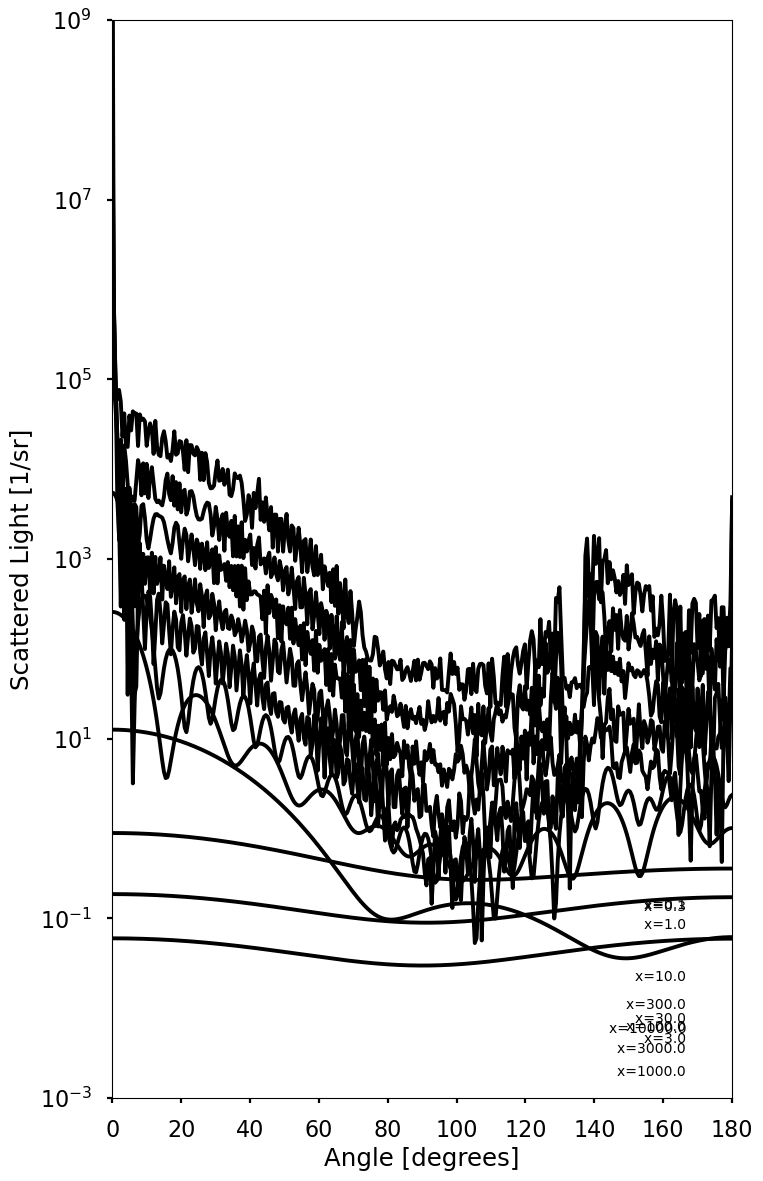

In [15]:
plt.figure(figsize=(8,14))
for x in [0.1,0.3,1,3,10,30,100,300,1000,3000,10000]:

    m = 1.33
    theta = np.linspace(0,180,360)
    mu = np.cos(theta*np.pi/180)

    mscat = miepython.i_unpolarized(m,x,mu)
    plt.plot(theta,mscat*5*x,'k')
    plt.annotate('x=%.1f   '%x,(theta[-20],mscat[-20]),ha='right',va='bottom')

plt.xlim(0,180)
plt.xlabel('Angle [degrees]')
plt.ylabel('Scattered Light [1/sr]')
plt.yscale('log')
plt.ylim(0.001,1e9)
plt.show()